Project : Energy Consumption Prediction for Smart Homes

Week 1:

Define the problem: 

Predict household energy consumption based on historical usage, weather, and appliance usage.

Goal: Improve efficiency by identifying wastage & forecasting demand.

Data Collection:

Download dataset from Kaggle (search: "Household Power Consumption Dataset").

Save dataset as .csv.

libraries: pip install pandas numpy matplotlib scikit-learn jupyter notebook seaborn

In [12]:
from pathlib import Path

# === UPDATE THIS PATH ===
DATA_PATH = Path('data/household_power_consumption.csv')


In [13]:
import pandas as pd

# Correct relative path
DATA_PATH = "data/household_power_consumption.csv"

# Load dataset
df = pd.read_csv(DATA_PATH)

# Show first few rows
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [14]:
# Shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Column names and data types
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check missing/null values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (1048575, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB
None

Summary Statistics:
       Sub_metering_3
count    1.044506e+06
mean     5.933837e+00
std      8.210398e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.700000e

In [15]:
# Drop duplicate rows if any
df = df.drop_duplicates()

# Drop rows with null values (or you could fill them)
df = df.dropna()

print("After Cleaning Shape:", df.shape)


After Cleaning Shape: (1044506, 9)


In [16]:
from sklearn.model_selection import train_test_split

# Suppose "Global_active_power" is the target (what we want to predict)
X = df.drop("Global_active_power",  axis=1)  # features
y = df["Global_active_power"]               # target

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (835604, 8)
Testing set size: (208902, 8)


Week-2: Algorithm Selection
        Model Training
        Model Evaluation

Training set size: (835604, 8)
Testing set size: (208902, 8)
Mean Squared Error: 0.0017326361874635827
R-squared: 0.9986483105109576


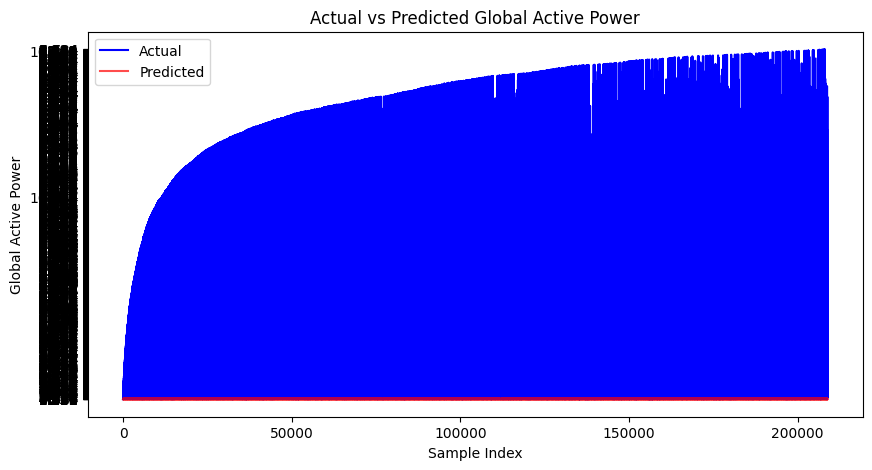

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Week 2: Model Building
# -----------------------------

# Convert 'Date' and 'Time' to numeric
df['Date_numeric'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').map(pd.Timestamp.timestamp)
df['Time_numeric'] = pd.to_timedelta(df['Time']).dt.total_seconds()

# Define features and target
X = df.drop(['Global_active_power', 'Date', 'Time'], axis=1)
y = df['Global_active_power']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# -----------------------------
# Plot: Actual vs Predicted
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Global Active Power')
plt.xlabel('Sample Index')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()
